In [1]:
import pandas as pd

In [19]:
df = pd.read_csv("students.csv")

In [21]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


(None,
   Student_ID       Name  Age  Gender   Location Enrolment_Date
 0       S001  Student_1   24  Female    Kolkata     24/11/2023
 1       S002  Student_2   32   Other    Chennai     27/02/2023
 2       S003  Student_3   28   Other     Mumbai     13/01/2023
 3       S004  Student_4   25  Female  Bangalore     21/05/2023
 4       S005  Student_5   24   Other      Delhi     06/05/2023)

In [23]:
missing_data = df.replace(r'^\s*$', pd.NA,regex = True).isna().sum()

In [25]:
duplicate_count = df.duplicated().sum()

In [27]:
df['Gender'] = df ['Gender'].str.strip().str.strip().str.capitalize()

In [34]:
df ['Enrolment_Data'] = pd.to_datetime(df['Enrolment_Date'], format = '%d/%m/%Y', errors ='coerce')

In [36]:
cleaned_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    object        
 4   Location        100 non-null    object        
 5   Enrolment_Date  100 non-null    object        
 6   Enrolment_Data  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.6+ KB


In [38]:
missing_data, duplicate_count, cleaned_info

(Student_ID        0
 Name              0
 Age               0
 Gender            0
 Location          0
 Enrolment_Date    0
 dtype: int64,
 0,
 None)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
sns.set(style="whitegrid")

In [44]:
gender_counts = df['Gender'].value_counts()

In [48]:
location_counts = df['Location'].value_counts()

In [50]:
age_stats = df['Age'].describe()

In [60]:
df['Enrolment_Date'] = pd.to_datetime(df['Enrolment_Date'], dayfirst=True, errors='coerce')

In [62]:
monthly_enrolments = df['Enrolment_Date'].dt.to_period("M").value_counts().sort_index()

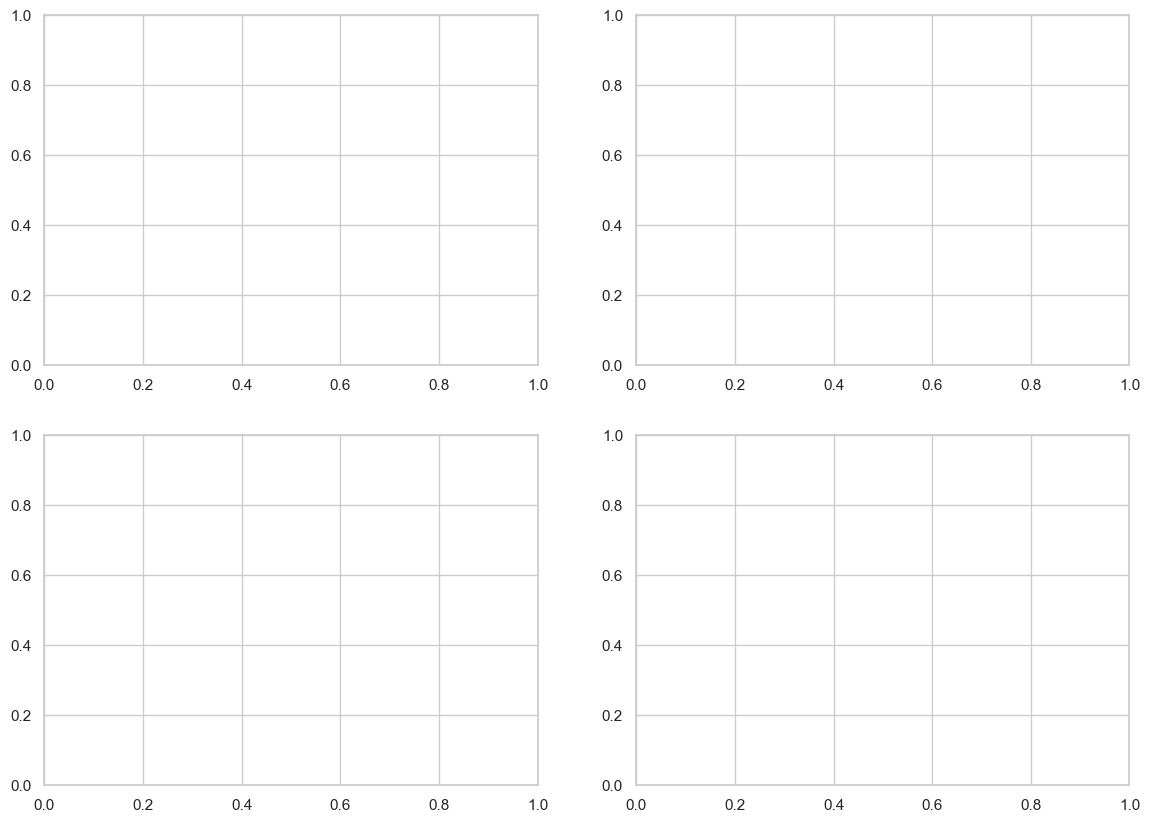

In [64]:
fig, axes = plt.subplots(2, 2, figsize= (14, 10))

In [66]:
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')
axes[0,0].set_ylabel('Count')

Text(4.444444444444459, 0.5, 'Count')

In [68]:
sns.barplot(x=location_counts.index, y=location_counts.values, ax=axes[0,1])
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=45)

In [70]:
sns.histplot(df['Age'], bins=10, kde= True, ax=axes[1,0])
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')

Text(0.5, 4.444444444444445, 'Age')

In [74]:
monthly_enrolments.plot(kind='line', marker= 'o', ax=axes[1,1])
axes[1,1].set_title('Monthly Enrolmnts')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Monthly of Enrolmnts')

Text(596.2626262626261, 0.5, 'Monthly of Enrolmnts')

In [76]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [80]:
age_stats

count    100.000000
mean      25.480000
std        4.835642
min       18.000000
25%       21.000000
50%       25.000000
75%       29.000000
max       34.000000
Name: Age, dtype: float64